## 패키지 로드

In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image

import pandas as pd
import numpy as np
import pydotplus

## 데이터 로드

In [2]:
data = pd.read_csv('country_erased.csv')
data

,imfGDP,gdpPerCapita,pop,eu_or_not,class
0,2.220000e+13,67063.2695,331002.651,not,advanced
1,1.550000e+13,10746.7828,1439323.776,not,newly
2,5.500000e+12,43450.1405,126476.461,not,advanced
3,4.160000e+12,49617.1450,83783.942,eu,advanced
4,3.260000e+12,2360.6592,1380004.385,not,newly
...,...,...,...,...,...
206,0.000000e+00,1278.9308,220892.340,not,developing
207,0.000000e+00,22496.8653,15.003,not,developing
208,0.000000e+00,1890.2804,43849.260,not,developing
209,0.000000e+00,1266.4138,17500.658,not,developing


## 데이터 전처리

In [3]:
data = data.replace('advanced', 0)
data = data.replace('newly', 1)
data = data.replace('developing', 2)

data = data.replace('eu', 3)
data = data.replace('not', 4)

data

,imfGDP,gdpPerCapita,pop,eu_or_not,class
0,2.220000e+13,67063.2695,331002.651,4,0
1,1.550000e+13,10746.7828,1439323.776,4,1
2,5.500000e+12,43450.1405,126476.461,4,0
3,4.160000e+12,49617.1450,83783.942,3,0
4,3.260000e+12,2360.6592,1380004.385,4,1
...,...,...,...,...,...
206,0.000000e+00,1278.9308,220892.340,4,2
207,0.000000e+00,22496.8653,15.003,4,2
208,0.000000e+00,1890.2804,43849.260,4,2
209,0.000000e+00,1266.4138,17500.658,4,2


## 속성과 클래스 분리

In [4]:
X = np.array(pd.DataFrame(data, columns = ['imfGDP', 'gdpPerCapita', 'pop', 'eu_or_not']))
y = np.array(pd.DataFrame(data, columns = ['class']))

In [5]:
X

array([[2.22000000e+13, 6.70632695e+04, 3.31002651e+05, 4.00000000e+00],
       [1.55000000e+13, 1.07467828e+04, 1.43932378e+06, 4.00000000e+00],
       [5.50000000e+12, 4.34501405e+04, 1.26476461e+05, 4.00000000e+00],
       [4.16000000e+12, 4.96171450e+04, 8.37839420e+04, 3.00000000e+00],
       [3.26000000e+12, 2.36065920e+03, 1.38000439e+06, 4.00000000e+00],
       [2.93000000e+12, 4.31175725e+04, 6.78860110e+04, 3.00000000e+00],
       [2.88000000e+12, 4.40615183e+04, 6.52735110e+04, 3.00000000e+00],
       [2.09000000e+12, 3.45747083e+04, 6.04618260e+04, 3.00000000e+00],
       [2.06000000e+12, 9.70316930e+03, 2.12559417e+05, 4.00000000e+00],
       [1.83000000e+12, 4.85528727e+04, 3.77421540e+04, 4.00000000e+00],
       [1.74000000e+12, 3.40235563e+04, 5.12691850e+04, 4.00000000e+00],
       [1.67000000e+12, 1.14260880e+04, 1.45934462e+05, 4.00000000e+00],
       [1.50000000e+12, 3.20198291e+04, 4.67547780e+04, 3.00000000e+00],
       [1.48000000e+12, 5.80967349e+04, 2.54998840e

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
X_train

array([[1.48000000e+12, 5.80967349e+04, 2.54998840e+04, 3.00000000e+00],
       [8.41580000e+10, 1.64801573e+04, 5.10662600e+03, 4.00000000e+00],
       [7.01060000e+10, 2.46540120e+03, 2.84359400e+04, 4.00000000e+00],
       [1.21290000e+10, 1.00047840e+03, 1.21232000e+04, 4.00000000e+00],
       [1.27930000e+10, 3.17132310e+03, 4.03396300e+03, 4.00000000e+00],
       [4.81200000e+09, 4.14768950e+03, 1.16016400e+03, 4.00000000e+00],
       [0.00000000e+00, 1.92872191e+04, 2.80908000e+02, 4.00000000e+00],
       [1.35420000e+10, 4.89039400e+02, 2.76910180e+04, 4.00000000e+00],
       [1.74000000e+12, 3.40235563e+04, 5.12691850e+04, 4.00000000e+00],
       [9.64260000e+10, 2.93388920e+03, 3.28662720e+04, 4.00000000e+00],
       [4.22100000e+09, 5.29147400e+02, 7.97698300e+03, 4.00000000e+00],
       [5.69700000e+09, 1.22525140e+03, 4.64965800e+03, 4.00000000e+00],
       [2.89000000e+11, 5.22031433e+04, 5.54072000e+03, 3.00000000e+00],
       [1.50000000e+12, 3.20198291e+04, 4.67547780e

In [8]:
X_test

array([[2.89200000e+09, 1.34998310e+03, 2.14224900e+03, 4.00000000e+00],
       [9.60000000e+08, 4.83836830e+03, 1.98414000e+02, 4.00000000e+00],
       [5.24750000e+10, 5.85910900e+02, 8.95614030e+04, 4.00000000e+00],
       [7.14030000e+10, 1.31231870e+03, 5.44098000e+04, 4.00000000e+00],
       [4.82000000e+11, 5.34817582e+04, 9.00639800e+03, 4.00000000e+00],
       [6.21580000e+10, 9.57256270e+04, 6.49335000e+02, 4.00000000e+00],
       [0.00000000e+00, 1.24301633e+04, 4.99200000e+00, 4.00000000e+00],
       [1.06280000e+10, 4.39053000e+02, 2.42066440e+04, 4.00000000e+00],
       [1.17000000e+08, 1.08093126e+04, 1.08240000e+01, 4.00000000e+00],
       [2.63000000e+11, 1.36779929e+04, 1.92376910e+04, 3.00000000e+00],
       [9.94000000e+08, 3.23625650e+03, 3.07145000e+02, 4.00000000e+00],
       [2.82000000e+11, 2.90092580e+03, 9.73385790e+04, 4.00000000e+00],
       [3.89000000e+11, 3.55032100e+03, 1.09581078e+05, 4.00000000e+00],
       [8.76290000e+10, 4.89122090e+03, 1.79155680e

In [9]:
y_train

array([[0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [0],
       [1],
       [2],
       [0],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [0],
       [1],
       [2],
       [0],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [2],
       [0],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [1],
       [0],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [1],
    

In [10]:
y_test

array([[2],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [1],
       [0],
       [1],
       [1],
       [2],
       [0],
       [2],
       [2],
       [0],
       [2],
       [2],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [1],
       [2],
       [0]])

## 데이터 학습

In [11]:
dt_clf = DecisionTreeClassifier()

In [12]:
dt_clf = dt_clf.fit(X_train, y_train)

In [13]:
dt_prediction = dt_clf.predict(X_test)

##  의사결정 트리 그래프 표현

In [14]:
feature_names = data.columns.tolist()

In [15]:
feature_names = feature_names[0:4]

In [16]:
feature_names

['imfGDP', 'gdpPerCapita', 'pop', 'eu_or_not']

In [17]:
target_name = np.array(['Advanced', 'Newly', 'Developing'])

In [18]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)

In [19]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

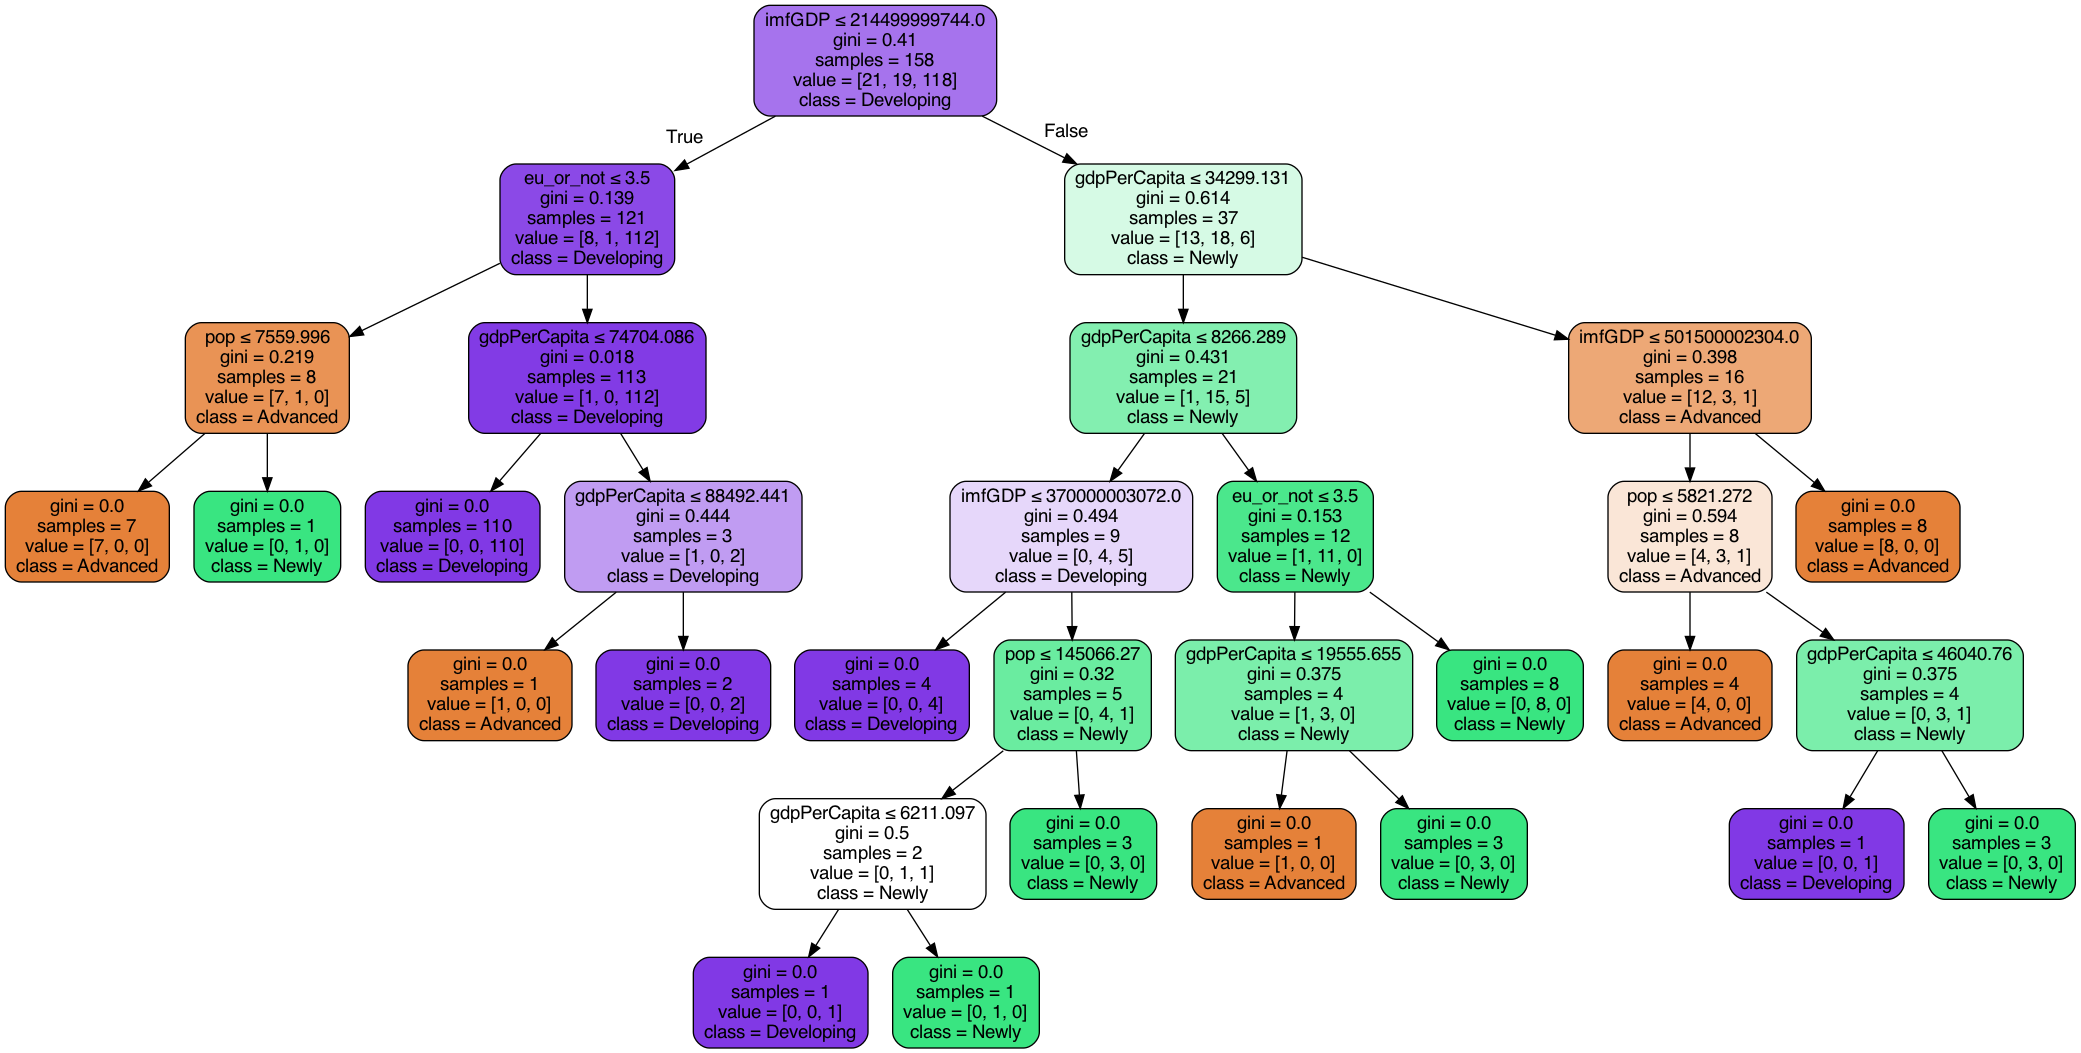

In [20]:
Image(dt_graph.create_png())

In [21]:
크로스 엔트로피: 엔트로피를 작아지도록.

SyntaxError: invalid syntax (<ipython-input-21-148d1aad3261>, line 1)

In [23]:
dt_clf.score(X_test, y_test)

0.8490566037735849